In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns   

In [2]:
doc = "C:\\Users\\DELL\\OneDrive\\Área de Trabalho\\Ironhack\\week 5\\lab-eda-univariate\\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(doc)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
df.shape

(2443651, 9)

In [4]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [5]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64'), dtype('bool')]

In [6]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [7]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [8]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 45]
potential_categorical_from_numerical

,stars,boughtInLastMonth
0,4.7,0
1,4.7,0
2,4.7,0
3,4.7,0
4,4.6,0
...,...,...
2443646,0.0,0
2443647,0.0,0
2443648,0.0,0
2443649,4.3,0


In [9]:
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [10]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [11]:
df_categorical = pd.concat([df.select_dtypes("object"), df.select_dtypes("boolean"), potential_categorical_from_numerical], axis=1)
df_categorical

,asin,title,category,isBestSeller,stars,boughtInLastMonth
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,False,4.7,0
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers,True,4.7,0
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers,False,4.7,0
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers,False,4.7,0
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers,False,4.6,0
...,...,...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",Motorbike Clothing,False,0.0,0
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,Motorbike Clothing,False,0.0,0
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,Motorbike Clothing,False,0.0,0
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,Motorbike Clothing,False,4.3,0


In [12]:
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical

,uid,reviews,price
0,1,15308,21.99
1,2,98099,23.99
2,3,15308,21.99
3,4,7205,31.99
4,5,1881,17.99
...,...,...,...
2443646,2828589,0,22.34
2443647,2828590,0,97.99
2443648,2828591,0,52.99
2443649,2828592,404,79.99


In [13]:
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns) + len(df.select_dtypes("boolean").columns)

True

In [14]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [15]:
df.drop("uid", inplace=True, axis=1)

In [16]:
# Create a crosstab between the product category and the isBestSeller status.
cross = pd.crosstab(df['category'], df['isBestSeller'])

# Are there categories where being a best-seller is more prevalent?
# Yes, there are categories where being a best-seller is more prevalent.

# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories 
# based on this proportion in descending order.

cross['proportion_best_seller'] = cross[True] / (cross[True] + cross[False])
cross_sorted = cross.sort_values(by='proportion_best_seller', ascending=False)
cross_sorted[['proportion_best_seller']]    

cross, cross_sorted


(isBestSeller                    False  True  proportion_best_seller
 category                                                           
 3D Printers                       247     1                0.004032
 3D Printing & Scanning           4065     2                0.000492
 Abrasive & Finishing Products     245     5                0.020000
 Action Cameras                   1696     1                0.000589
 Adapters                          251     3                0.011811
 ...                               ...   ...                     ...
 Wind Instruments                  243     7                0.028000
 Window Treatments                 234     5                0.020921
 Women                           17559   213                0.011985
 Women's Sports & Outdoor Shoes   1939    20                0.010209
 eBook Readers & Accessories       246     0                0.000000
 
 [296 rows x 3 columns],
 isBestSeller                    False  True  proportion_best_seller
 catego

In [17]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

_ , chi2_p_value, _, _ = chi2_contingency(cross)
chi2_p_value

# With that result we can concluded that the best seller is dependent of the product category.

np.float64(0.0)

In [18]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats.contingency import association

cross_counts = cross.iloc[:, :2].astype(int)
association(cross_counts, method="cramer")

# The Cramér's V value, 0.12,indicates a low association between best-seller status and product category.

0.1222829439760564

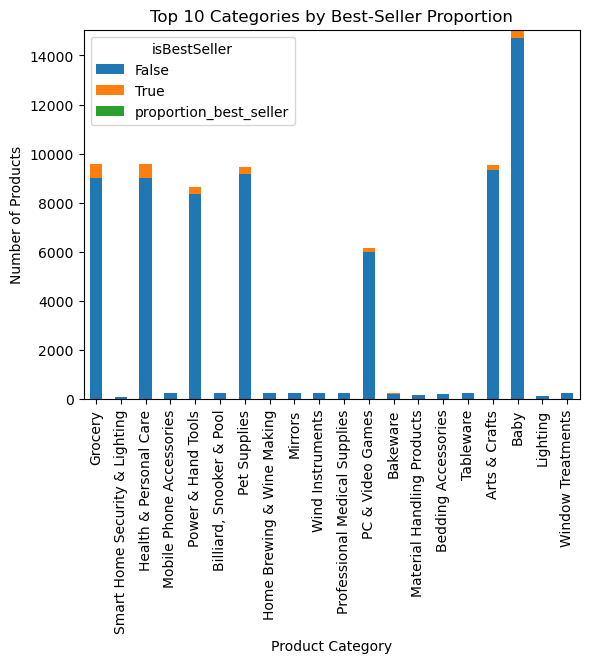

In [19]:
cross_sorted = cross_sorted.head(20)

cross_sorted.plot(kind="bar", stacked=True)
plt.ylabel("Number of Products")
plt.xlabel("Product Category")
plt.title("Top 10 Categories by Best-Seller Proportion")
plt.show()

In [20]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [21]:
outliers = tukeys_test_outliers(df['price'])
outliers.sort_values(ascending=True)

662877        100.00
2058652       100.00
2359799       100.00
1464964       100.00
2152974       100.00
             ...    
319555      22933.42
1408966     23482.73
1905315     24674.59
1987238     77752.00
2008013    100000.00
Name: price, Length: 327688, dtype: float64

In [22]:
# Remove outliers from the 'price' column
df_no_outliers = df[~df['price'].isin(outliers)]

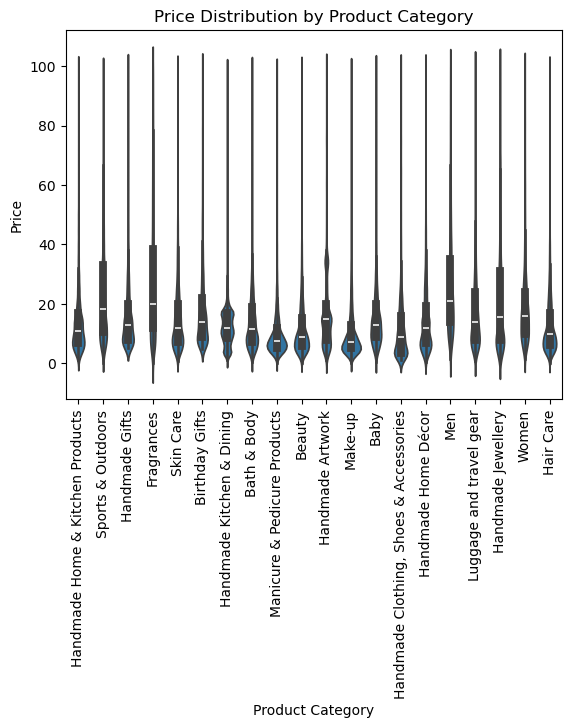

In [23]:
# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

top20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top20_categories)]

sns.violinplot(x=df_top20['category'], y=df_top20['price'])
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.xlabel("Product Category")
plt.title("Price Distribution by Product Category")
plt.show()

In [24]:
# Which product category tends to have the highest median price? Don't filter here by top categories.
df_no_outliers.groupby('category')['price'].median().idxmax()

'Desktop PCs'

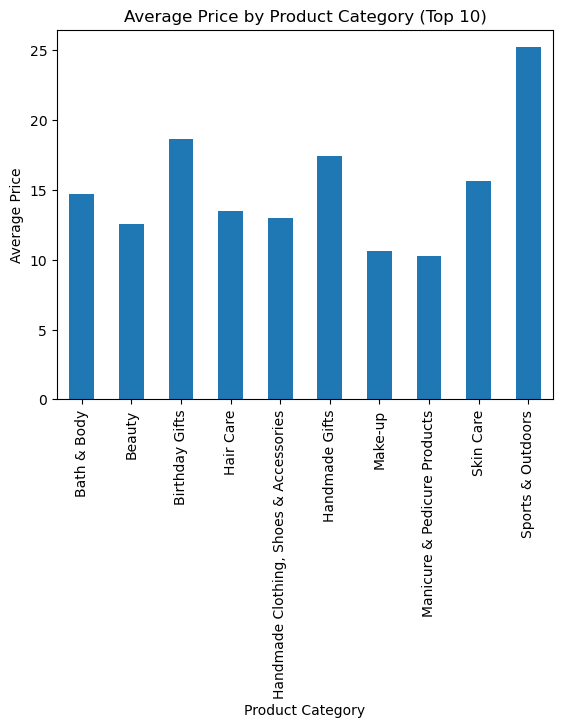

'Motherboards'

In [25]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
top10_categories = df_no_outliers['category'].value_counts().head(10).index
avg_price_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories)].groupby('category')['price'].mean()

# Plotting
avg_price_top10.plot(kind='bar')
plt.ylabel("Average Price")
plt.xlabel("Product Category")
plt.title("Average Price by Product Category (Top 10)")
plt.show()

# Which product category commands the highest average price? Don't filter here by top categories.
df_no_outliers.groupby('category')['price'].mean().idxmax()

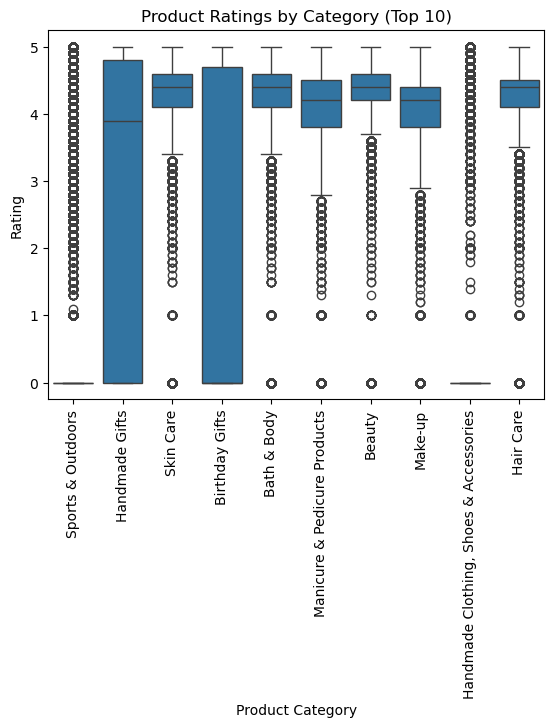

In [ ]:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. 
# Filter out the top 10 categories based on count for better visualization.
df_no_outliers_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories)]
sns.boxplot(x=df_no_outliers_top10['category'], y=df_no_outliers_top10['stars'])
plt.xticks(rotation=90) 
plt.ylabel("Rating")
plt.xlabel("Product Category")
plt.title("Product Ratings by Category (Top 10)")
plt.show()

In [29]:
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
highest_median_category = median_ratings.idxmax()
highest_median_value = median_ratings.max()

highest_median_category, highest_median_value

('Computer Memory', 4.7)

In [31]:
# Calculate the correlation coefficient between price and stars. 
# Is there a significant correlation between product price and its rating?
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
correlation


np.float64(-0.0776729987818137)

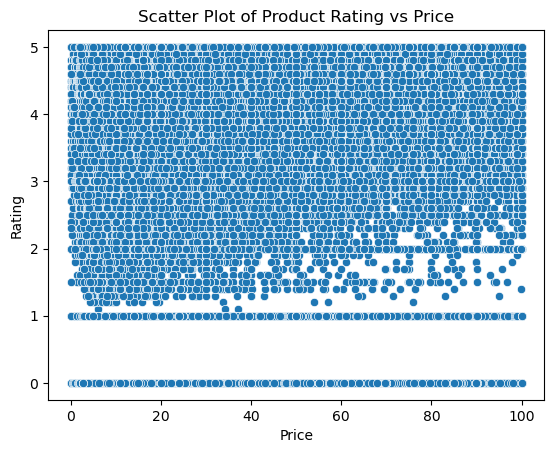

In [33]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(x='price', y='stars', data=df_no_outliers)
plt.title("Scatter Plot of Product Rating vs Price")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

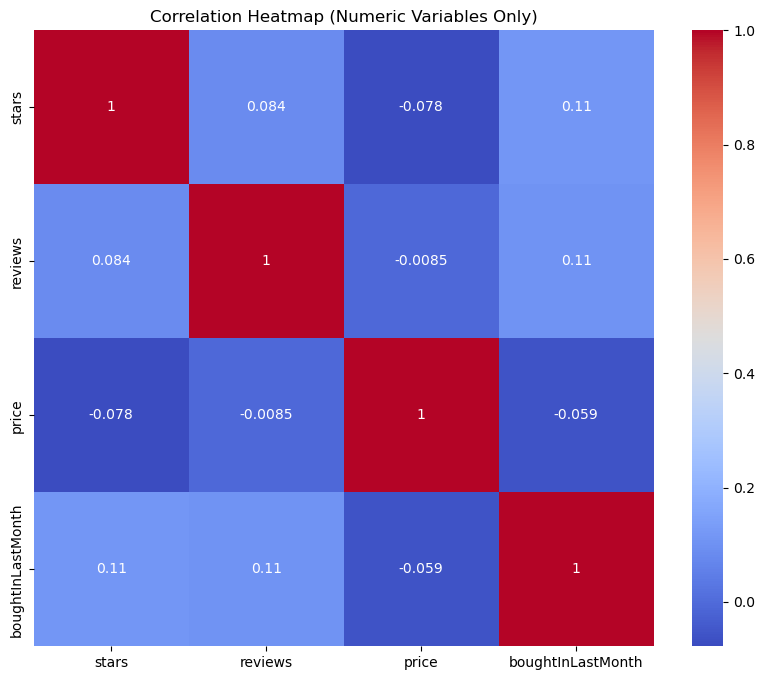

In [36]:
# Use a correlation heatmap to visualize correlations between all numerical variables.
correlation_matrix = df_no_outliers.select_dtypes(include='number').corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

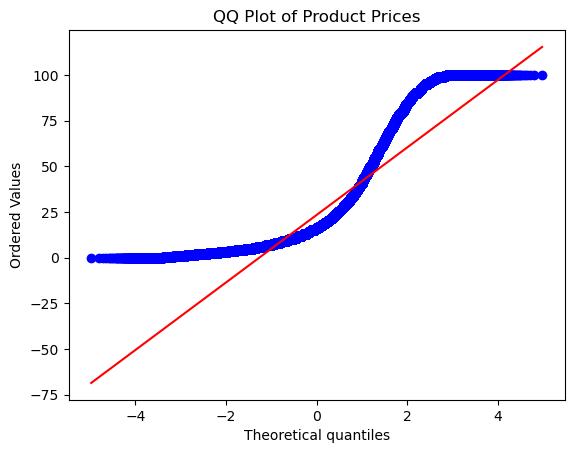

In [35]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.show()